<a href="https://colab.research.google.com/github/brmpiton/minhas_analises/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  O **objetivo** desta analise é fazer um estudo em cima dos dados do  desastre envolvendo a famosa embarcação britânica 'RMS Titanic' que ocorreu em 1912, que culminou em seu naufrágio nas águas do oceano atlântico. 

O **dataset** utilizado está disponível no Kaggle (https://www.kaggle.com/competitions/titanic) e é utilizado por muitos iniciantes em Data Science como um estudo/ desafio.

Aqui, o estudo ficará somente na Análise dos dados, sem ter como uma das etapas criar um modelo de classificação para predizer se as pessoas iriam morrer ou sobreviver.

Essa é minha primeira análise e foi feita totalmente do zero, na qual me apliquei por duas semanas, usando a maior parte do tempo reestudando e fixando os materiais utilizados para entrar na area da data science analytics ( plataforma Alura de cursos ) assim como lendo e estudando outras análises sobre diversos outros datasets no Medium.

**Variáveis** do dataset:

PassengerId: 

Survived: Se o passageiro sobreviveu ou não do desastre (0= Não, 1= Sim).

Pclass: A classe que o passageiro viajou (1= 1º classe, 2= 2º classe, 3= 3º classe).

Name: Nome do passageiro.

Sex: Sexo do passageiro.

Age: Idade do passageiro.

SibSp: SIBlings(irmãos) + SPouse(marido ou esposa): Quantas irmãos e marido/esposa haviam no navio.

Parch: PARents (Pai/mãe) + CHildren(filhos/crianças): Quantos pai/mãe e crianças relativas ao passageiro estavam no navio.

Ticket: Número do ticket da passagem.

Fare: Preço da passagem.

Cabin: O código da cabine do passageiro.

Embarked: O local onde o passageiro embarcou (S= Southampton, Q = Queenstown, C = Cherbourg)

# Data Extraction

In [1]:
#Carregando os arquivos (São 3 datasets. Vamos carregá-los e depois juntar num só)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# OBS: Como esse dataset é voltado para uma competição de predição sobre a sobrevivência, ele vem separado em treino e teste(test.csv + gender_submission(É o target do test)).
train = pd.read_csv('train.csv')
gender_submission = pd.read_csv('gender_submission.csv')
test = pd.read_csv('test.csv')

In [2]:
train[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
gender_submission[:3] # Esse dataset é o TARGET do 'test.csv'. Precisamos juntar os dois, para depois juntar com o train.

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [4]:
test[:3]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
# Juntando test com gender_submission(target)
dados_test = pd.concat([test, gender_submission.drop(['PassengerId'], axis = 1)],axis = 1)


# Juntando os dados de treino com os dados de teste
dados = pd.concat([train, dados_test], axis = 0, ignore_index=True)

In [6]:
# Traduzindo as colunas
dados.columns = ['Id','Sobreviveu','Classe','Nome','Sexo','Idade','Irmãos/Conjugue','Parentes/Crianças','Bilhete','Tarifa','Cabine','Embarque']

In [7]:
dados[:3]

,Id,Sobreviveu,Classe,Nome,Sexo,Idade,Irmãos/Conjugue,Parentes/Crianças,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
dados.info()
# Ao todo são 1309 passageiros e o dataset é composto por 11 variáveis além do target (Sobreviveu).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1309 non-null   int64  
 1   Sobreviveu         1309 non-null   int64  
 2   Classe             1309 non-null   int64  
 3   Nome               1309 non-null   object 
 4   Sexo               1309 non-null   object 
 5   Idade              1046 non-null   float64
 6   Irmãos/Conjugue    1309 non-null   int64  
 7   Parentes/Crianças  1309 non-null   int64  
 8   Bilhete            1309 non-null   object 
 9   Tarifa             1308 non-null   float64
 10  Cabine             295 non-null    object 
 11  Embarque           1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


# Cleaning

Vamos agora fazer um tratamento nas variáveis faltantes, com excessão da variável idade, pois vamos trabalhá-la após a análise de todas as outras variáveis.

In [9]:
# Visualizando os dados faltantes
dados.isnull().sum().sort_values(ascending = False)[:5]
# Somente 4 variáveis faltantes: Cabine, Idade, Local_embarque e Tarifa.

Cabine      1014
Idade        263
Embarque       2
Tarifa         1
Id             0
dtype: int64

Cabine

In [10]:
# Como possui muitos valores faltantes(1014 de 1309), vamos excluir a variável .
dados.drop(['Cabine'], axis = 1, inplace = True)

Idade

In [11]:
# São 263 valores faltantes ( um valor significativo ).
# Vamos fazer o tratamento e estudo dessa variável no final da analise das outras variáveis.

Embarque

In [12]:
# São somente 2 valores faltantes. Vamos preencher pelo valor mais frenquente. 
embarque_mais_frequente = dados['Embarque'].value_counts().index[0]

dados['Embarque'] = dados['Embarque'].fillna(embarque_mais_frequente)

Tarifa

In [13]:
# É somente 1 valor faltante. Vamos preencher com a média
media_tarifa = dados['Tarifa'].mean()
dados['Tarifa'] = dados['Tarifa'].fillna(media_tarifa)

In [14]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1309 non-null   int64  
 1   Sobreviveu         1309 non-null   int64  
 2   Classe             1309 non-null   int64  
 3   Nome               1309 non-null   object 
 4   Sexo               1309 non-null   object 
 5   Idade              1046 non-null   float64
 6   Irmãos/Conjugue    1309 non-null   int64  
 7   Parentes/Crianças  1309 non-null   int64  
 8   Bilhete            1309 non-null   object 
 9   Tarifa             1309 non-null   float64
 10  Embarque           1309 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


# Analisando e Visualizando 

In [15]:
# Vamos iniciar a análise proprimente dita. O objetivo é se aprofundar nos dados e obter informações significativas que explicam a sobrevivencia ou não do passageiro
dados.info()
#Todas preenchidas (Exceto Idade - vamos trabalhá-la no final da análise)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1309 non-null   int64  
 1   Sobreviveu         1309 non-null   int64  
 2   Classe             1309 non-null   int64  
 3   Nome               1309 non-null   object 
 4   Sexo               1309 non-null   object 
 5   Idade              1046 non-null   float64
 6   Irmãos/Conjugue    1309 non-null   int64  
 7   Parentes/Crianças  1309 non-null   int64  
 8   Bilhete            1309 non-null   object 
 9   Tarifa             1309 non-null   float64
 10  Embarque           1309 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


## Sexo

In [16]:
# Pelo o que assistimos do filme : "Mulheres e crianças na frente"
  # É esperado que as mulheres tenham uma taxa de sobrevivencia superior a dos homens 
dados['Sexo'].value_counts() # O número de homens embarcados é quase o dobro do das mulheres.

male      843
female    466
Name: Sexo, dtype: int64

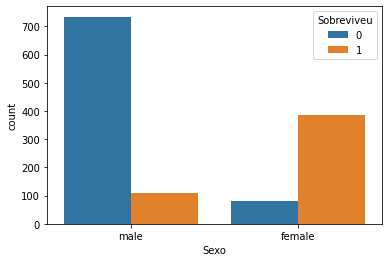

In [17]:
sns.countplot(x='Sexo',hue = 'Sobreviveu',data = dados)
# Uma diferença gritante..

In [18]:
# Vamos calcular a taxa de sobrevivencia dos sexos para termos uma visão mais quantitativa.
homens = dados[dados['Sexo']=='male']
taxa_homens = (homens['Sobreviveu'].value_counts()[1]/homens.shape[0])*100 

mulheres = dados[dados['Sexo']=='female']
taxa_mulheres = (mulheres['Sobreviveu'].value_counts()[1]/mulheres.shape[0])*100

print(f'A taxa de sobrevivencia dos HOMENS é de {taxa_homens.round(2)}%\n e a das MULHERES {taxa_mulheres.round(2)}%.')
# São tão diferentes que compensa analisar as outras variáveis levando-se em conta o sexo dos sobreviventes.
# A chance de uma mulher sobreviver é coisa de 6 a 7 vezes maior do que os homens

A taxa de sobrevivencia dos HOMENS é de 12.93%
 e a das MULHERES 82.62%.


## Classe

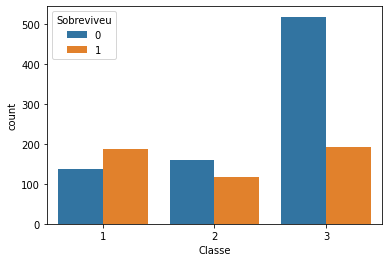

In [19]:
# De início, não acredito que as pessoas mais pobres aceitariam a morte por conta da classe de sua passagem.
# Vamos então verificar se a classe das pessoas é um fator relevante para a sobrevivencia.
sns.countplot(x='Classe', data = dados, hue = 'Sobreviveu')
# O pessoal da 1 classe teve uma taxa de sobrevivencia um pouco superior a 50%
# O pessoal da 2 classe teve uma taxa de sobrevivencia um pouco inferior a 50%
# O pessoal da 3 classe teve uma taxa de sobrevivencia muito inferior às demais

<BarContainer object of 3 artists>

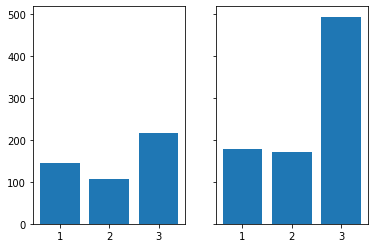

In [20]:
# Vamos Verificar a quantidade de pessoas por sexo em cada uma das classes


# Montando uma tabela com valores
classe_dist = dados['Classe'].value_counts().sort_index().values
classe_mulheres = dados[dados['Sexo']=='female']['Classe'].value_counts().sort_index().values
classe_homens = dados[dados['Sexo']=='male']['Classe'].value_counts().sort_index().values

dicionario_totais = {'Classe':[1,2,3],
                     'Total':classe_dist,
                     'Quantidade Mulheres':classe_mulheres,
                     'Quantidade Homens':classe_homens}

df_classe = pd.DataFrame(dicionario_totais)  

import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True)
ax1.bar('Classe','Quantidade Mulheres', data = df_classe)
ax2.bar('Classe','Quantidade Homens', data = df_classe)
# Tem uma pequena quantidade de homens amais do que mulheres na 1º e 2º classes.
# Já na 3º classe, a quantidade de homens é MUITO superior a das mulheres. 
    # Isso pode explicar o porque da taxa de sobrevivencia dessa classe foi bem menor do que as outras.   

<BarContainer object of 3 artists>

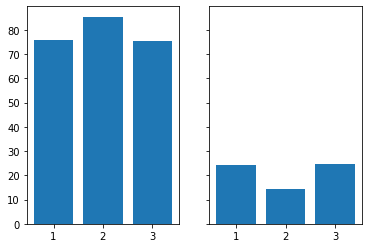

In [21]:
# Vamos analisar a taxa de sobrevivência. 
classe_sobrevivente = dados[dados['Sobreviveu']==1]['Classe'].value_counts().sort_index()
sobrevivente_mulheres = dados[(dados['Sexo']=='female') & (dados['Sobreviveu']==1)]['Classe'].value_counts().sort_index()
sobrevivente_homens = dados[(dados['Sexo']=='male') & (dados['Sobreviveu']==1)]['Classe'].value_counts().sort_index()

porcentagem_mulher = ((sobrevivente_mulheres/classe_sobrevivente)*100).round(2)
porcentagem_homem = ((sobrevivente_homens/classe_sobrevivente)*100).round(2)

dicionario_porcentagem = {'Classe':[1,2,3],
                          'Porcentagem Mulheres':porcentagem_mulher,
                          'Porcentagem Homens':porcentagem_homem}

df_classe_porcentagem = pd.DataFrame(dicionario_porcentagem) 

fig, (ax1,ax2) = plt.subplots(1,2,sharey = True)
ax1.bar('Classe','Porcentagem Mulheres', data = df_classe_porcentagem)
ax2.bar('Classe','Porcentagem Homens', data = df_classe_porcentagem)
# As mulheres da 2 classe possuem uma taxa um poquinho maior de sobrevivencia do que as outras (Será que é uma diferença significativa?(*)). O oposto acontece com os homens.
# Já na 1 e 3 classe a chance de sobrevivencia parecem a mesma entre os sexos

In [22]:
from scipy.stats import ranksums
classe_2 = dados[dados['Classe']==2]['Sobreviveu']
classe_13 = dados[(dados['Classe']==1)|(dados['Classe']==3)]['Sobreviveu']

z,pv = ranksums(classe_2,classe_13)
pv 
# Não existe diferença significativa, logo não podemos dizer que as pessoas da 2 classe podem ou não podem ter 'morrido' mais ou menos.

0.14421665828187105

## Nome

In [23]:
# É uma variável aparentenmente inútil, porém,
  # ao analisar um pouco mais afundo é possível notar que em todos os nomes existe um título. 
dados['Nome']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Nome, Length: 1309, dtype: object

In [24]:
# Criaremos então uma nova varável apartir de dados['Nome'], usando extract e replace e fazer as analises em cima dessa nova variável dados['Titulos']
dados['Titulos'] =dados['Nome'].str.extract( '([A-Za-z]+\.)')
dados['Titulos'].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Titulos, dtype: int64

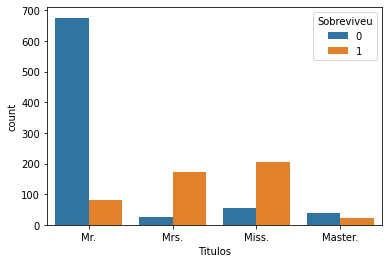

In [25]:
# Visualizando a sobrevivencia dos títulos mais frequentes.
selecao = ['Mr.','Master.','Mrs.','Miss.']
sns.countplot(x='Titulos',data = dados[dados['Titulos'].isin(selecao)], hue = 'Sobreviveu' )
# Nota-se que 'Mrs.' e 'Miss.'(títulos femininos) possui uma chance de sobrevivencia muito maior do que 
  # os títulos 'Mr.' e 'Master.'(títulos masculinos).

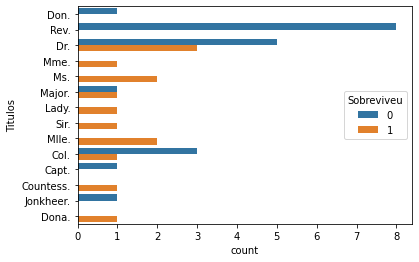

In [26]:
# Visualizando a sobrevivencia dos títulos menos frequentes.
selecao = ['Rev.','Dr.','Col.','Mlle.','Major.','Ms.','Lady.','Sir.','Mme.','Don.','Capt.','Countess.','Jonkheer.','Dona.']
sns.countplot(y='Titulos',data = dados[dados['Titulos'].isin(selecao)], hue = 'Sobreviveu')

In [27]:
# Vamos agrupar esses títulos menos frequentes em 'Outros homens' , 'Outras mulheres' e 'Militares'.

# Vamos primeiro visualizar quais são os títulos femininos e masculinos
titulos_masculinos = dados[dados['Sexo']=='male']['Titulos'].unique()
titulos_femininos = dados[dados['Sexo']=='female']['Titulos'].unique()

print(f'Títulos masculinos : {titulos_masculinos}') 
print(f'Títulos femininos : {titulos_femininos}')
# O título Dr. aparece tanto pra homem quanto para mulher, além disso, é possível separar esses títulos em 
  # 'títulos de nobreza' e 'títulos de oficiais/pilotos do navio'

Títulos masculinos : ['Mr.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Major.' 'Sir.' 'Col.' 'Capt.'
 'Jonkheer.']
Títulos femininos : ['Mrs.' 'Miss.' 'Mme.' 'Ms.' 'Lady.' 'Mlle.' 'Countess.' 'Dr.' 'Dona.']


In [28]:
# Corrigindo o título de Dr. para Dra.
dados[(dados['Titulos'] == 'Dr.')&(dados['Sexo']=='female')]
dados['Titulos'].loc[796] = 'Dra.'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [29]:
# Separando os títulos menos frequentes em 3 grupos: nobres homens, militares, nobres_mulheres
nobres_homens = ['Don.','Jonkheer.','Sir.','Dr.','Rev.']
militar = ['Major.','Col.','Capt.',]
nobres_mulheres = ['Mme.','Lady.','Mlle.','Countess.','Dra.','Dona.']

# Substituindo
dados['Titulos'] = dados['Titulos'].replace('Ms.','Miss.')
dados['Titulos'] = dados['Titulos'].replace(nobres_mulheres,'Outras Mulheres Nobres')
dados['Titulos'] = dados['Titulos'].replace(nobres_homens,'Outros Homens Nobres')
dados['Titulos'] = dados['Titulos'].replace(militar,'Militares')
dados['Titulos'].value_counts()

Mr.                       757
Miss.                     262
Mrs.                      197
Master.                    61
Outros Homens Nobres       18
Outras Mulheres Nobres      7
Militares                   7
Name: Titulos, dtype: int64

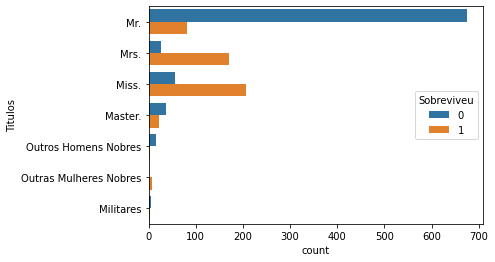

In [30]:
# Visualizando a sobrevivencia por título (agora com os títulos menos frequentes agrupados) .
sns.countplot(y='Titulos',hue = 'Sobreviveu',data = dados)
# Fica meio ruim para interpretar os valores menos frequentes. Vamos então utilizar como métrica a taxa de sobrevivencia.

Analisando proporcionalmente

In [31]:
lista_titulos_sobreviventes = dados.groupby('Sobreviveu')['Titulos'].value_counts()[1].sort_index()
lista_titulos_totais = dados['Titulos'].value_counts().sort_index()

tabela_porcentagem_titulos = ((lista_titulos_sobreviventes/lista_titulos_totais)*100).round(3)

dict = {'Titulos' : tabela_porcentagem_titulos.index.values,
        'Porcentagem %' : tabela_porcentagem_titulos.values}
df_porcentagem= pd.DataFrame(dict)        
df_porcentagem
# Entre os títulos femininos: Miss(79%) < Mrs(86,8%) < Outras(100%), mas a diferença parece ser muito pequena. Vamos verificar se existe diferença significativa.
# Entre os títulos masculino: Mr(10,7%) < Outros Homens Nobres(16,6%) < Militares(28,5%) < Master(37,7%). A taxa dos 'Militares' e dos 'Master' parece ser muito superior a dos outros. Vamos verificar 

,Titulos,Porcentagem %
0,Master.,37.705
1,Militares,28.571
2,Miss.,79.008
3,Mr.,10.700
4,Mrs.,86.802
5,Outras Mulheres Nobres,100.000
6,Outros Homens Nobres,16.667


In [32]:
# Visualizando se existe diferença de sobrevivencia entre os títulos femininos (Mrs,Miss e Outras mulheres)

from scipy.stats import ranksums
dados_mrs = dados[dados['Titulos']=='Mrs.']['Sobreviveu']
dados_miss = dados[dados['Titulos']=='Miss.']['Sobreviveu']
dados_outras = dados[dados['Titulos']=='Outras Mulheres Nobres']['Sobreviveu']
_,pv1 = ranksums(dados_mrs,dados_miss)
_,pv2 = ranksums(dados_mrs,dados_outras)
_,pv3 = ranksums(dados_miss,dados_outras)
print(pv1,pv2,pv3)
# O tipo de título feminino não causa diferença na sobrevivência

0.152705728079635 0.5532558431487073 0.343316728017542


In [33]:
# visualizando se é diferente
from scipy.stats import ranksums
selecao_mr_outros = ['Mr.','Outros Homens Nobres']
dados_mr_outros = dados[dados['Titulos'].isin(selecao_mr_outros)]['Sobreviveu']

selecao_master_militares = ['Master.','Militares']
dados_master_militares = dados[dados['Titulos'].isin(selecao_master_militares)]['Sobreviveu']

_,pv = ranksums(dados_mr_outros,dados_master_militares)
print(pv) # A sobrevivencia dos passageiros com título 'Mr.' e 'Outros Homens Nobres' é diferente (menor) do que 'Master.' e 'Militares'. 

0.0003876080672648017


In [34]:
# Removendo a variável nome (Já que não nos é mais útil)
del dados['Nome']

## Irmãos/Conjugue e Parentes/Crianças

Irmãos/Conjugues

In [35]:
# A grande maioria ou estava sozinho ou acompanhado de uma pessoa.
dados['Irmãos/Conjugue'].value_counts().sort_index()

0    891
1    319
2     42
3     20
4     22
5      6
8      9
Name: Irmãos/Conjugue, dtype: int64

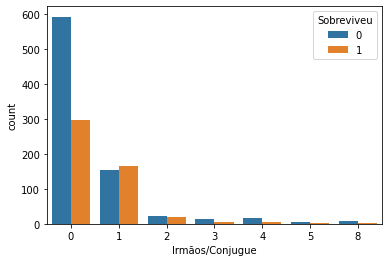

In [36]:
# Vemos que as pessoas que estavam sozinhas parece que tiveram uma taxa muito menor de sobrevivencia do que as pessoas que estavam com 1 acompanhante.
sns.countplot(x='Irmãos/Conjugue',data = dados, hue = 'Sobreviveu')

In [37]:
# Vamos analisar a porcentagem de sobrevivencia:

distribuicao_irmaos_conjugue = dados['Irmãos/Conjugue'].value_counts().sort_index()
distribuicao_irmaos_conjugue_sobreviventes = dados[dados['Sobreviveu']==1]['Irmãos/Conjugue'].value_counts().sort_index()
porcentagem_irmaos_conjugue = ((distribuicao_irmaos_conjugue_sobreviventes/distribuicao_irmaos_conjugue)*100).round(2)

df_irmaos_conjugue = pd.DataFrame({'Irmãos/Conjugue' : distribuicao_irmaos_conjugue.index.values,
                                   'Taxa sobrevivencia(%)' : porcentagem_irmaos_conjugue})

df_irmaos_conjugue 
# Vemos que quem tinha 1,2 filhos/conjugue tinham uma chance rasoável de sobrevivencia comparado aos outros.
# Já os que estavam sozinhos ou os que possuem muitos Irmãos/Conjugue, tiveram uma taxa de sobrevivencia relativamente baixa.

,Irmãos/Conjugue,Taxa sobrevivencia(%)
0,0,33.45
1,1,52.04
2,2,45.24
3,3,25.00
4,4,18.18
5,5,16.67
8,8,11.11


Parentes/Crianças

In [38]:
# Vamos verificar a distrivuição dessa variável:
dados['Parentes/Crianças'].value_counts().sort_index()
# A grande maioria não estava com parentes e/ou crianças, além disso pouquíssimos passageiros apresentam valores acima de 3 Parentes/Crianças.

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: Parentes/Crianças, dtype: int64

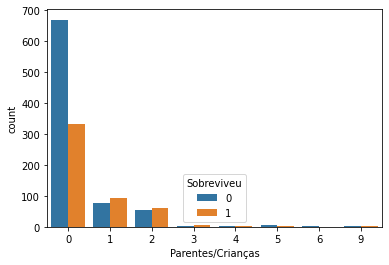

In [39]:
# Visualizando a distribuição pela sobrevivência
sns.countplot(x='Parentes/Crianças',hue='Sobreviveu',data = dados)
# Parece se comportar como a distribuição de Filhos/Conjugue

In [40]:
# Vamos verificar numéricamente essa distribuição:
distribuicao_parentes = dados['Parentes/Crianças'].value_counts().sort_index()
distribuicao_parentes_sobreviventes = dados.groupby('Parentes/Crianças')['Sobreviveu'].sum()
porcentagem_parentes = ((distribuicao_parentes_sobreviventes/distribuicao_parentes)*100).round(2)

df_parentes = pd.DataFrame({'Parentes' : distribuicao_parentes.index.values,
                            'Nº Total de pessoas':distribuicao_parentes.values,
                            'Nº Sobreviventes':distribuicao_parentes_sobreviventes.values,
                            'Taxa sobrevivencia(%)' : porcentagem_parentes})
df_parentes 
# Para os valores com maior frequencia (pessoas com 1 ou 2 Parentes/Crianças) a taxa de sobrevivencia é quase identica a da filhos/conjugue.
# Já os outros valores (pessoas com 3,4,5,6,9) já se mostram um pouco mais diferentes, mas por serem poucas pessoas, é esperado que a taxa fique muito dispersa.
# As pessoas que não possuem parentes, possuem uma taxa 20% a menos do que quem tem 1 ou 2.. é muito estranho. 

,Parentes,Nº Total de pessoas,Nº Sobreviventes,Taxa sobrevivencia(%)
Parentes/Crianças,,,,
0,0,1002,332,33.13
1,1,170,93,54.71
2,2,113,60,53.10
3,3,8,5,62.50
4,4,6,2,33.33
5,5,6,1,16.67
6,6,2,0,0.00
9,9,2,1,50.00


Criando a variável Acompanhantes

In [41]:
# Vamos ver se juntando essas duas variáveis, que possuem comportamento parecido, conseguimos alguma informação nova.

dados['Acompanhantes'] = dados['Parentes/Crianças'] + dados['Irmãos/Conjugue']

In [42]:
# Vamos montar uma tabela para visualizar a distribuição da variável criada
distribuicao_acompanhantes = dados['Acompanhantes'].value_counts().sort_index()
distribuicao_acompanhantes_sobreviventes = dados.groupby('Acompanhantes')['Sobreviveu'].sum()
porcentagem_acompanhantes = ((distribuicao_acompanhantes_sobreviventes/distribuicao_acompanhantes)*100).round(2)

df_acompanhantes = pd.DataFrame({'Acompanhantes' : distribuicao_acompanhantes.index.values,
                        'Nº Total de pessoas':distribuicao_acompanhantes.values,
                        'Nº Sobreviventes':distribuicao_acompanhantes_sobreviventes.values,
                        'Taxa sobrevivencia(%)' : porcentagem_acompanhantes})
df_acompanhantes
# Parece haver uma diferença muito significativa entre as pessoas que não possuem acompanhantes

,Acompanhantes,Nº Total de pessoas,Nº Sobreviventes,Taxa sobrevivencia(%)
Acompanhantes,,,,
0,0,790,231,29.24
1,1,235,125,53.19
2,2,159,89,55.97
3,3,43,31,72.09
4,4,22,5,22.73
5,5,25,5,20.00
6,6,16,5,31.25
7,7,8,1,12.50
10,10,11,2,18.18


In [43]:
# Verificando se as pessoas que estavam sozinhas possuem mesmo menos chance de sobreviver
acompanhantes_0 = dados[dados['Acompanhantes']==0]['Sobreviveu']
acompanhantes_1_ou_mais = dados[dados['Acompanhantes']!=0]['Sobreviveu']

z,pv = ranksums(acompanhantes_0,acompanhantes_1_ou_mais)
pv < 0.05 # Observa-se que as pessoas que estavam sozinhas possuem uma menor chance de sobrevivência. 
# Um provável motivo deve ser a existÊncia de uma proporção masculina que esteja sozinha a 'afunda' a chance de sobreviver.

True

In [44]:
lista = []
indice = (dados['Acompanhantes'].sort_values().unique())
for i in indice:
  porcentagem = (dados[(dados['Sexo']==1)&(dados['Acompanhantes']==i)].shape[0]/dados[dados['Acompanhantes']==i].shape[0])*100
  lista.append(porcentagem)
pd.DataFrame([indice,lista])
# Observa-se que os valores da variável acompanhantes com uma maioria de HOMENS são os valores 0,5,7 e 10, cujas chances de sobrevivnência são 29%, 20%, 12.5% e 18.8%.
# Logo, podemos confirmar que a alta proporção de homens cujo o numero de acompanhantes é 'responsável' pela baixa taxa de sobrevivência.
# Ou seja, haviam muitos homens sozinhos no navio, e a maioria destes não sobreviveu. 

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,10.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Bilhete

In [45]:
# Vamos observar os valores únicos dessa variável:
dados['Bilhete'].unique() # Parece inútil... não tenho ideia de como aproveitar essa variável

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [46]:
# Vamos excluí-la.
del dados['Bilhete']

## Tarifa

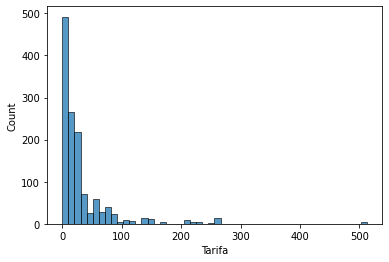

In [47]:
# Vamos observar a distribuição dessa variável
sns.histplot(x='Tarifa',data = dados, bins = 50)
# Tem uns outliers que pagaram mais do que 500, além de pessoas que não pagaram nada.
# Parece um gráfico qualquer de distribuição de renda.

In [48]:
# Observando os outliers
dados[dados['Tarifa']>300]
# Os quatro são um casal Cardeza (é Mr. e Mrs. não é de alto status) e outras duas pessoas não relacionadas.
# O valor da Tarifa é o mesmo para os quatro passageiros. Seria interessante verificar a validade desses dados com o fornecedor..
# Para isso, podemos usar a variável nome.

,Id,Sobreviveu,Classe,Sexo,Idade,Irmãos/Conjugue,Parentes/Crianças,Tarifa,Embarque,Titulos,Acompanhantes
258,259,1,1,female,35.0,0,0,512.3292,C,Miss.,0
679,680,1,1,male,36.0,0,1,512.3292,C,Mr.,1
737,738,1,1,male,35.0,0,0,512.3292,C,Mr.,0
1234,1235,1,1,female,58.0,0,1,512.3292,C,Mrs.,1


In [49]:
# Visualizando os passageiros que não pagaram nada de Tarifa:
dados[dados['Tarifa']==0]
# Esse grupo de pessoas é composto por todos homens, não acompanhados e embarcaram em S...
# Podemos utilizar da variável nome (Já foi excluída) para solicitar ou procurar outras informações sobre os mesmos e descobir o porque não pagaram nada.
# Provavelmente são pessoas que estavam trabalhando no navio 

,Id,Sobreviveu,Classe,Sexo,Idade,Irmãos/Conjugue,Parentes/Crianças,Tarifa,Embarque,Titulos,Acompanhantes
179,180,0,3,male,36.0,0,0,0.0,S,Mr.,0
263,264,0,1,male,40.0,0,0,0.0,S,Mr.,0
271,272,1,3,male,25.0,0,0,0.0,S,Mr.,0
277,278,0,2,male,NaN,0,0,0.0,S,Mr.,0
302,303,0,3,male,19.0,0,0,0.0,S,Mr.,0
413,414,0,2,male,NaN,0,0,0.0,S,Mr.,0
466,467,0,2,male,NaN,0,0,0.0,S,Mr.,0
481,482,0,2,male,NaN,0,0,0.0,S,Mr.,0
597,598,0,3,male,49.0,0,0,0.0,S,Mr.,0
633,634,0,1,male,NaN,0,0,0.0,S,Mr.,0


In [50]:
# Vamos tentar estratificar para transformar em uma variável discreta e podermos analisar a sobrevivencia

# Pegando os quantis:
quantis = []
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]: # em uma análise ele usa o ocmando .cut e corta nessas faixas
  quantis.append(dados['Tarifa'].quantile(i))

quantis.append(max(dados['Tarifa']))  
quantis

# Estratificando a Tarifa
lista_tarifa = []
for i in dados['Tarifa']:
  if i < quantis[0]:
    lista_tarifa.append(0)
  elif  (i < quantis[1])&(i >= quantis[0]):
    lista_tarifa.append(1)  
  elif  (i < quantis[2])&(i >= quantis[1]):
    lista_tarifa.append(2) 
  elif  (i < quantis[3])&(i >= quantis[2]):
    lista_tarifa.append(3)
  elif  (i < quantis[4])&(i >= quantis[3]):
    lista_tarifa.append(4)
  elif  (i < quantis[5])&(i >= quantis[4]):
    lista_tarifa.append(5)
  elif  (i < quantis[6])&(i >= quantis[5]):
    lista_tarifa.append(6)
  elif  (i < quantis[7])&(i >= quantis[6]):
    lista_tarifa.append(7)
  elif  (i < quantis[8])&(i >= quantis[7]):
    lista_tarifa.append(8)
  else :
    lista_tarifa.append(9)    

# Criando a variável Tarifa_estratificada
dados['Tarifa_estratificada'] = lista_tarifa

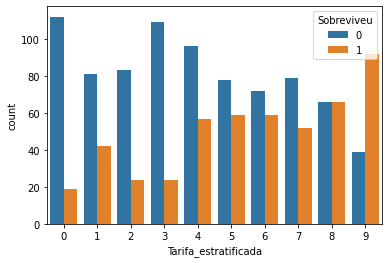

In [51]:
# Plotando um gráfico para visualizar a proporção de sobrevivência dado a tarifa estratificada
sns.countplot(x='Tarifa_estratificada',hue = 'Sobreviveu', data = dados)
# Fica evidente que com o aumento da tarifa, a taxa de sobrevivência é maior.
# O que está alinhado com os estudos feitos na variável Classe_economica, onde os da 3 º classe possuem a maior chance de não sobreviver.

## Embarque

In [15]:
# Visualizando a distribuição dessa variável
dados['Embarque'].value_counts() # A maioria das pessoas embarcaram em S.

S    916
C    270
Q    123
Name: Embarque, dtype: int64

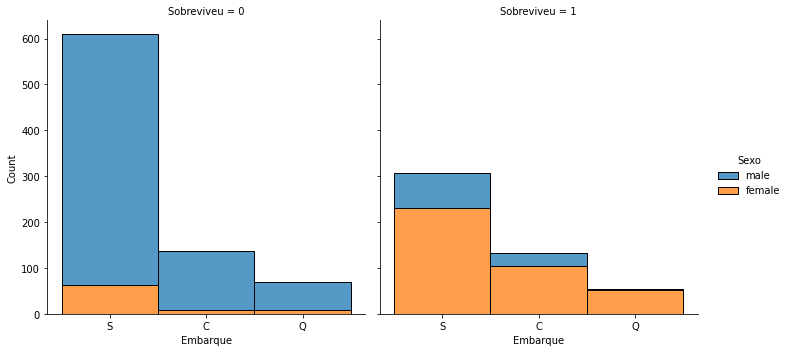

In [31]:
# Visualizando o Embarque pela taxa de sobrevivência e sexo 
sns.displot(x='Embarque', data = dados, hue = 'Sexo',multiple = 'stack', col = 'Sobreviveu')
# Vemos que a proporção de homens para mulheres de embarque 'S' parece ser bem maior do que a dos outros dois.
# Vamos montar uma tabela com as porcentagens de sobrevivência para fazer uma análise mais precisa

In [35]:
# Verificando se existe diferença na taxa de sobrevivência quanto o local de Embarque
lista = []
for i in ['S','C','Q']:
  porcentagens_i = dados[dados['Embarque']==i]['Sobreviveu'].value_counts()[1]/(dados[dados['Embarque']==i]['Sobreviveu'].value_counts()[0]+dados[dados['Embarque']==i]['Sobreviveu'].value_counts()[1])
  lista.append((porcentagens_i*100).round(2))
print(f'A taxa de sobrevivência de S, C e Q são , respectivamente, {lista}')
# O esperado para 'S' era uma taxa pequena mesmo, por conta da alta concentração de homens.
# Pra 'C' e 'Q', nota-se taxas próximas de 50%, oque é esperado por conta de ter uma quantidade de homens parecida com a de mulheres.
# Portanto, podemos dizer que sabendo que uma pessoa embarcou em S, sua chance de sobrevivência é inferior aos passageiros que embarcaram nas demais.

A taxa de sobrevivência de S, C e Q são , respectivamente, [33.52, 49.26, 43.9]


## Idade

In [56]:
# Só sobrou idade com valor faltante (263)
dados['Idade'].isnull().sum()
# Vamos primeiro fazer um tratamento de outras variáveis para encontrar os valores faltantes através de uma regressão linear.
# Para isso precisamos que todas as variáveis sejam int ou float

263

In [57]:
# Analisando se existe diferença para as outras variáveis numéricas
from scipy.stats import ranksums
print('Comparando os dados as pessoas que possuem registro de idade com as que não o possui, notamos que existe uma diferença significativa entre as seguintes variáveis numéricas. \n')
for i in ['Sobreviveu','Classe','Irmãos/Conjugue','Parentes/Crianças','Tarifa','Idade','Sexo','Embarque','Titulos','Acompanhantes']:
  com_idade = dados[dados['Idade'].notnull()][i]
  sem_idade = dados[dados['Idade'].isnull()][i]

  z,pv = ranksums(com_idade,sem_idade)
  if pv<0.05:
    print(f'{i } : P-Value  {pv}')
# Ou seja, os dados com idade faltante são diferentes entre, pelo menos, nas variáveis numéricas, ficando difícil encontrar motivo para a ausência desses dados. 
# Dessa forma, podemos concluir que não é MCAR, pois a falta desse dado não ocorre de forma aleatória. 
# Logo, não podemos simplesmente apagar os dados(além do fato que representa uma parcela significativa do dataset).
# Utilizaremos o metodo de preenchimento de dados faltantes através de uma regressão linear(https://bookdown.org/mwheymans/bookmi/single-missing-data-imputation.html)

Comparando os dados as pessoas que possuem registro de idade com as que não o possui, notamos que existe uma diferença significativa entre as seguintes variáveis numéricas. 

Sobreviveu : P-Value  0.007867463275995829
Classe : P-Value  2.5806617083620215e-13
Irmãos/Conjugue : P-Value  0.0025721301437453834
Parentes/Crianças : P-Value  0.00018862726501565986
Tarifa : P-Value  4.132080906279807e-15
Idade : P-Value  5.009766525092384e-139
Embarque : P-Value  4.0246586876992904e-07
Acompanhantes : P-Value  1.7424709728708123e-06


### Transformando alguma variáveis para modelo de ML

In [58]:
# Transformando a variável Sexo em numérica 
troca_sexo = {'male': 1,
              'female': 0}
dados['Sexo'] = dados['Sexo'].map(troca_sexo)            

In [59]:
# Transformando a variável Titulos em numérica 
troca_titulos = {'Mr.':0,
                 'Mrs.':5,
                 'Miss.':4,
                 'Master.':3,
                 'Outros Homens Nobres':1,
                 'Outras Mulheres Nobres':6,
                 'Militares':2}
dados['Titulos'] = dados['Titulos'].map(troca_titulos)

In [60]:
# Transformando a variável Embarque em numérica 
troca_embarque = {'S':0,
                        'C':1,
                        'Q':2}
dados['Embarque'] = dados['Embarque'].map(troca_embarque)  

### Criando modelo de ML (regressão linear) para preencher valores faltantes

In [61]:
# Separando os items que possuem o valor de idade dos que não possuem.
dados_com_idade = dados[dados['Idade'].notnull()]
dados_sem_idade = dados[dados['Idade'].isnull()]

In [62]:
# Criando o modelo de regressão linear para 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(dados_com_idade.drop(['Idade'],axis = 1),dados_com_idade[['Idade']])

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

(array([  2.,   6.,   3.,  15.,  35., 133.,  19.,  17.,  16.,  17.]),
 array([ 0.3,  5. ,  9.7, 14.4, 19.1, 23.8, 28.5, 33.2, 37.9, 42.6, 47.3]),
 <a list of 10 Patch objects>)

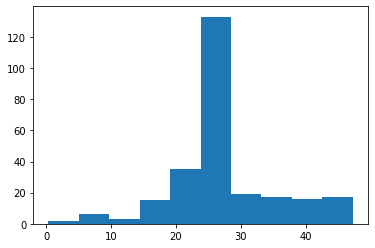

In [63]:
# Salvando as previsões
previsoes_idade = model.predict(dados_sem_idade.drop(['Idade'],axis = 1)).round(1)
plt.hist(previsoes_idade)
# Algumas vezes, ao rodar a regressão gera-se valores negativos muito pequenos.
# É necessário então "Positivar" previsoes_idade. Vamos Substituir esses valores negativos (que são muito pequenos) a zero.

(array([  2.,   6.,   3.,  15.,  35., 133.,  19.,  17.,  16.,  17.]),
 array([ 0.3,  5. ,  9.7, 14.4, 19.1, 23.8, 28.5, 33.2, 37.9, 42.6, 47.3]),
 <a list of 10 Patch objects>)

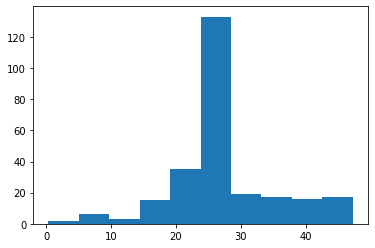

In [64]:
# Antes de substituir por zero, precisamos pegar previsoes idades (onde cada Yi é um array) e transformar em um array só.

# Retirando os [] dos números já que o resultado da regressão é um array de arrays.(Deve ter um jeito mais simples do que eu fiz para fazer isso)
lista_previsoes = []
for i in previsoes_idade:
  if i == 0:
    lista_previsoes.append(i)
  else:
    lista_previsoes.append(i[0])
previsoes_idade = lista_previsoes

# Substituindo por 0 os valores negativos
lista_idade_positiva = []
for i in previsoes_idade:
  if i < 0:
    lista_idade_positiva.append(0)
  else:
    lista_idade_positiva.append(i)
previsoes_idade = lista_idade_positiva 

# Visualizando previsoes_idade com valores positivos
plt.hist(previsoes_idade) # Como se nota, a maioria dos valores que ele utilizou para preencher está entre 20 ~ 30 anos.

In [65]:
# Atribuindo os valores que obtivemos através da regressão aos itens que possuiam Idade faltantes
dados_sem_idade['Idade'] = previsoes_idade

# Juntando de novo e obtendo o dataset com as idades preenchidas
dados_idade = pd.concat([dados_com_idade,dados_sem_idade],axis = 0).sort_values(by='Id')
# Agora podemos fazer a análise em cima da variável Idade

<ipython-input-65-05c8232ae283>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_sem_idade['Idade'] = previsoes_idade


### Analise da idade

(array([ 80.,  65., 329., 396., 189., 131.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

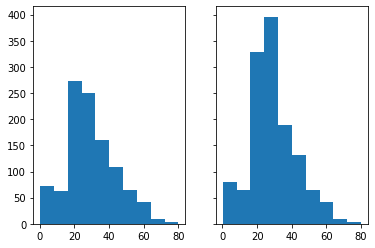

In [66]:
# Visualizando o Antes e o depois do preenchimento.
fig, (ax1,ax2) = plt.subplots(1,2,sharey = True)
ax1.hist('Idade', data = dados)
ax2.hist('Idade', data = dados_idade)

Criando a variável Idade_estratificada

In [67]:
# Vamos criar essa nova variável para realizar algumas visualizações com o seaborn.

# Encontrando as classes através dos quantis:
quantis = []
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
  quantis.append(dados_idade['Idade'].quantile(i).round(0))
quantis  

[16.0, 20.0, 23.0, 25.0, 28.0, 30.0, 34.0, 40.0, 48.0]

In [68]:
# Criando as classes:
lista_idade_estratificada = []

for i in dados_idade['Idade']:
  if i <= quantis[0] :
    lista_idade_estratificada.append(0)
  elif (i <= quantis[1]) & (i > quantis[0]):  
    lista_idade_estratificada.append(1)
  elif (i <= quantis[2]) & (i > quantis[1]):  
    lista_idade_estratificada.append(2)  
  elif (i <= quantis[3]) & (i > quantis[2]):  
    lista_idade_estratificada.append(3)
  elif (i <= quantis[4]) & (i > quantis[3]):  
    lista_idade_estratificada.append(4)
  elif (i <= quantis[5]) & (i > quantis[4]):  
    lista_idade_estratificada.append(5)
  elif (i <= quantis[6]) & (i > quantis[5]):  
    lista_idade_estratificada.append(6)
  elif (i <= quantis[7]) & (i > quantis[6]):  
    lista_idade_estratificada.append(7)
  elif (i <= quantis[8]) & (i > quantis[7]):  
    lista_idade_estratificada.append(8)
  else:  
    lista_idade_estratificada.append(9)

# Atribuindo as classes à variável
dados_idade['Idade_estratificada'] = lista_idade_estratificada

(0.0, 100.0)

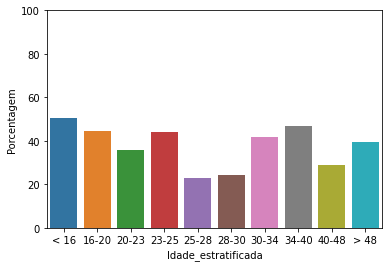

In [69]:
# Visualizando a porcentagem de sobrevivência:
tabela = pd.DataFrame()
viveu = dados_idade[dados_idade['Sobreviveu'] == 1]['Idade_estratificada'].value_counts().sort_index()
morreu = dados_idade[dados_idade['Sobreviveu'] == 0]['Idade_estratificada'].value_counts().sort_index()
                   
tabela['Porcentagem'] = ((viveu/(morreu + viveu))*100).round(2)
tabela['Idade_estratificada'] = ['< 16','16-20','20-23','23-25','25-28','28-30','30-34','34-40','40-48','> 48']

ax = sns.barplot(x = 'Idade_estratificada',y = 'Porcentagem', data = tabela)
ax.set_ylim(0,100)
# Os jovens possuem uma alta taxa de sobrevivencia até os 25 anos (com destaque aos menores de 16), o que condiz com o filme (mulheres e CRIANÇAS na frente)
#  enquanto os 'jovens adultos' de 25 - 30 possuem uma taxa muito menor, o que é estranho..

In [70]:
# Visualizando a diferença de porcentagem de sobrevivência entre homens e mulheres.

# Vamos criar um dataframe para visualizar como tabela(Dataframe) e como gráfico de barras

# Gerando o Dataframe
dados_idade_homens = dados_idade[dados_idade['Sexo'] == 1]
total_idade_homem = dados_idade_homens['Idade_estratificada'].value_counts().sort_index()
viveu_idade_homem = dados_idade_homens[dados_idade_homens['Sobreviveu']==1]['Idade_estratificada'].value_counts().sort_index()
porcentagem_idade_homem = ((viveu_idade_homem / total_idade_homem)*100).round(2)
dados_idade_mulher = dados_idade[dados_idade['Sexo'] == 0]
total_idade_mulher = dados_idade_mulher['Idade_estratificada'].value_counts().sort_index()
viveu_idade_mulher = dados_idade_mulher[dados_idade_mulher['Sobreviveu']==1]['Idade_estratificada'].value_counts().sort_index()
porcentagem_idade_mulher = ((viveu_idade_mulher / total_idade_mulher)*100).round(2)


dic_idade =  {'Index':['< 16','16-20','20-23','23-25','25-28','28-30','30-34','34-40','40-48','> 48'],
              '% homem':porcentagem_idade_homem.values,
              '% mulher':porcentagem_idade_mulher.values,
              'Diferença':porcentagem_idade_mulher.values-porcentagem_idade_homem.values }

df_idade = pd.DataFrame(dic_idade)
df_idade
# As maiores diferenças ocorrem nas faixas : > 48 ,20-23,34-40,28-30,23-25

,Index,% homem,% mulher,Diferença
0,< 16,31.17,72.06,40.89
1,16-20,13.33,82.26,68.93
2,20-23,4.94,86.00,81.06
3,23-25,12.12,84.62,72.50
4,25-28,8.66,76.47,67.81
5,28-30,4.35,77.14,72.79
6,30-34,21.88,86.21,64.33
7,34-40,17.98,91.38,73.40
8,40-48,9.68,76.32,66.64
9,> 48,11.39,95.00,83.61


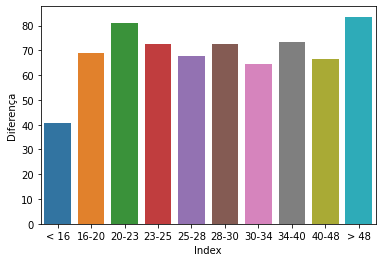

In [71]:
# Visualizando graficamente o dataframe
sns.barplot(x= 'Index',y='Diferença', data = df_idade)
# Nota-se que entre as crianças (< 16 anos ), homens e mulheres apresentam uma chance maior de sobrevivencia, sendo que a da menina é o dobro da do menino.
# Já nas outras faixas etárias, a chance de sobrevivencia do homem é coisa de 5-7 vezes menor do que as mulheres.
# Para os mais velhos (> 48 ) a chance de sobrevivencia das mulheres é coisa de 8-9 vezes maior do que a dos homens dessa faixa etária.
